In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [31]:
df= pd.read_csv("zara.csv",delimiter=';')
df= df.dropna()
df.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN


In [32]:
df.dtypes

Product ID            int64
Product Position     object
Promotion            object
Product Category     object
Seasonal             object
Sales Volume          int64
brand                object
url                  object
sku                  object
name                 object
description          object
price               float64
currency             object
scraped_at           object
terms                object
section              object
dtype: object

In [33]:
# Sales Volume Stats
print("\nSales Volume:")
print(f"  Average: {df['Sales Volume'].mean():.0f} units")
print(f"  Median: {df['Sales Volume'].median():.0f} units")
print(f"  Minimum: {df['Sales Volume'].min():.0f} units")
print(f"  Maximum: {df['Sales Volume'].max():.0f} units")
print(f"  Total: {df['Sales Volume'].sum():,} units")


Sales Volume:
  Average: 1822 units
  Median: 1836 units
  Minimum: 529 units
  Maximum: 2989 units
  Total: 455,556 units


In [34]:
# Price Stats
print("\nPrice:")
print(f"  Average: ${df['price'].mean():.2f}")
print(f"  Median: ${df['price'].median():.2f}")
print(f"  Minimum: ${df['price'].min():.2f}")
print(f"  Maximum: ${df['price'].max():.2f}")


Price:
  Average: $85.23
  Median: $74.94
  Minimum: $7.99
  Maximum: $439.00


In [35]:

category_stats = df.groupby('terms').agg({'Sales Volume': ['sum', 'mean', 'count'],'price': 'mean'}).round(2)
category_stats.columns = ['Total Sales', 'Avg Sales', 'Number of Products', 'Avg Price']
category_stats = category_stats.sort_values('Total Sales', ascending=False)
print(category_stats)

          Total Sales  Avg Sales  Number of Products  Avg Price
terms                                                          
jackets        255451    1851.09                 138     104.19
sweaters        75242    1835.17                  41      54.86
shoes           57906    1867.94                  31      64.87
t-shirts        53637    1676.16                  32      67.43
jeans           13320    1665.00                   8      63.92


In [36]:
# PROMOTION IMPACT
promo_yes = df[df['Promotion'] == 'Yes']['Sales Volume'].mean()
promo_no = df[df['Promotion'] == 'No']['Sales Volume'].mean()

print(f"\nAverage sales WITH promotion: {promo_yes:.0f} units")
print(f"Average sales WITHOUT promotion: {promo_no:.0f} units")
print(f"Difference: {promo_yes - promo_no:.0f} units ({((promo_yes/promo_no - 1)*100):.1f}% increase)")

print(f"\nNumber of products with promotion: {(df['Promotion']=='Yes').sum()}")
print(f"Number of products without promotion: {(df['Promotion']=='No').sum()}")


Average sales WITH promotion: 1824 units
Average sales WITHOUT promotion: 1821 units
Difference: 4 units (0.2% increase)

Number of products with promotion: 118
Number of products without promotion: 132


In [37]:
# STORE POSITION IMPACT
position_stats = df.groupby('Product Position').agg({'Sales Volume': ['mean', 'count']}).round(2)
position_stats.columns = ['Avg Sales', 'Number of Products']
position_stats = position_stats.sort_values('Avg Sales', ascending=False)
print(position_stats)

                  Avg Sales  Number of Products
Product Position                               
Front of Store      1873.14                  69
Aisle               1828.82                  97
End-cap             1772.77                  84


In [38]:
# SEASONAL PRODUCTS
print("SEASONAL VS NON-SEASONAL")
seasonal_yes = df[df['Seasonal'] == 'Yes']['Sales Volume'].mean()
seasonal_no = df[df['Seasonal'] == 'No']['Sales Volume'].mean()

print(f"\nAverage sales for SEASONAL products: {seasonal_yes:.0f} units")
print(f"Average sales for NON-SEASONAL products: {seasonal_no:.0f} units")
print(f"Difference: {seasonal_yes - seasonal_no:.0f} units")

SEASONAL VS NON-SEASONAL

Average sales for SEASONAL products: 1819 units
Average sales for NON-SEASONAL products: 1826 units
Difference: -7 units


CREATING VISUALIZATIONS


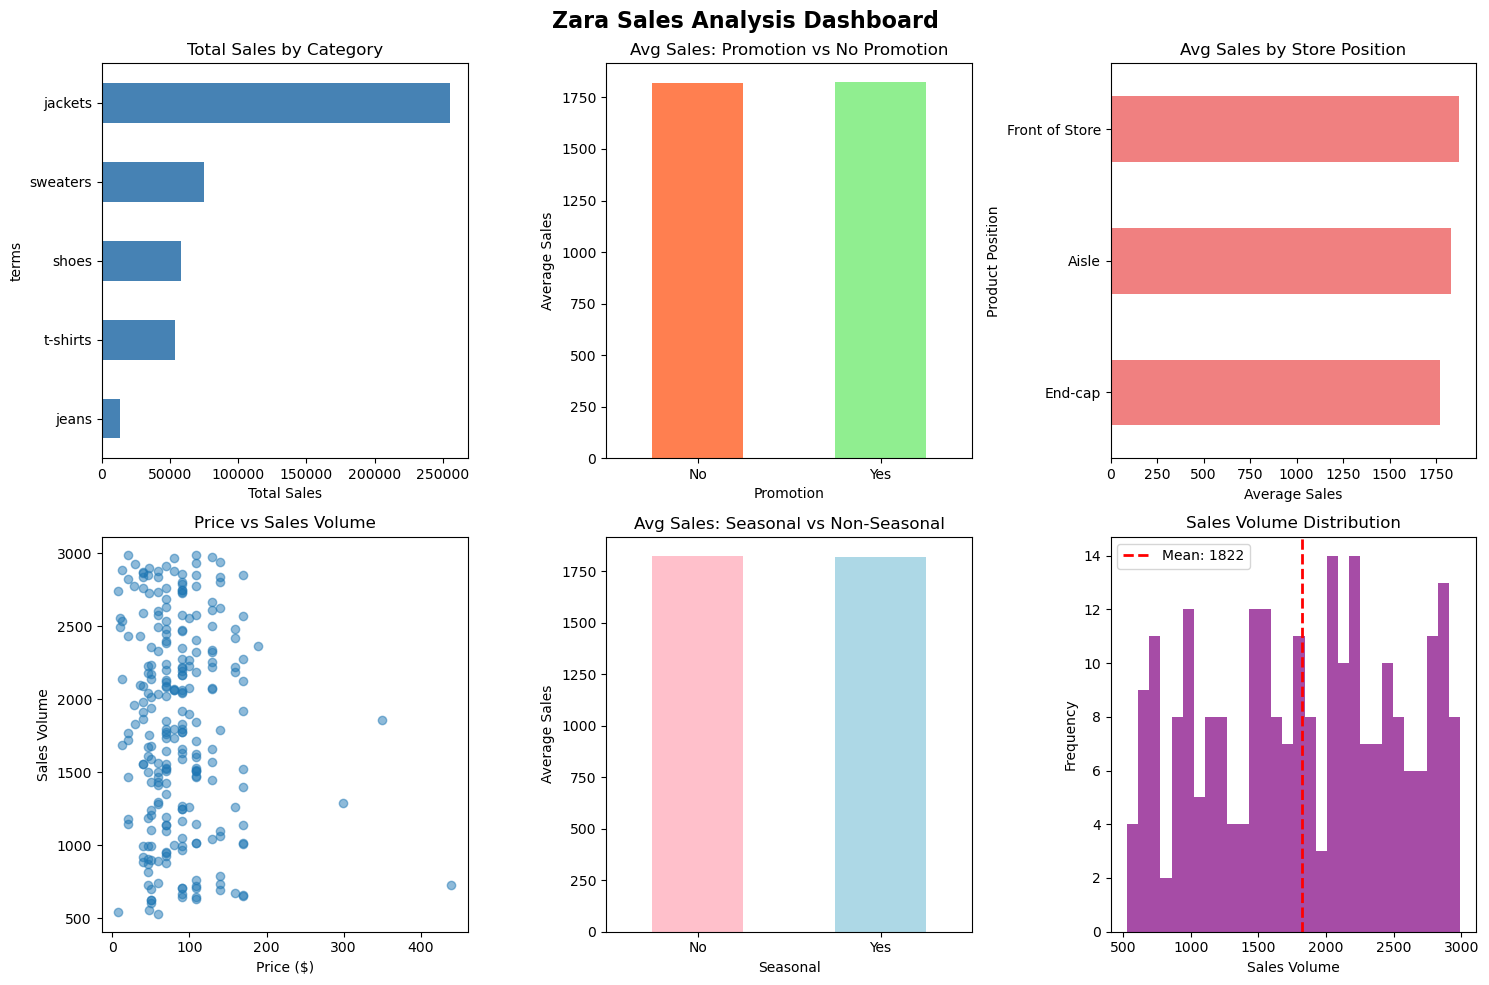


Visualization saved as 'zara_analysis.png'


In [52]:
# SIMPLE VISUALIZATIONS
print("CREATING VISUALIZATIONS")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Zara Sales Analysis Dashboard', fontsize=16, fontweight='bold')

# Chart 1: Sales by Category
ax1 = axes[0, 0]
category_sales = df.groupby('terms')['Sales Volume'].sum().sort_values()
category_sales.plot(kind='barh', ax=ax1, color='steelblue')
ax1.set_title('Total Sales by Category')
ax1.set_xlabel('Total Sales')

# Chart 2: Promotion Impact
ax2 = axes[0, 1]
promo_avg = df.groupby('Promotion')['Sales Volume'].mean()
promo_avg.plot(kind='bar', ax=ax2, color=['coral', 'lightgreen'])
ax2.set_title('Avg Sales: Promotion vs No Promotion')
ax2.set_ylabel('Average Sales')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)

# Chart 3: Store Position Impact
ax3 = axes[0, 2]
position_avg = df.groupby('Product Position')['Sales Volume'].mean().sort_values()
position_avg.plot(kind='barh', ax=ax3, color='lightcoral')
ax3.set_title('Avg Sales by Store Position')
ax3.set_xlabel('Average Sales')

# Chart 4: Price vs Sales
ax4 = axes[1, 0]
ax4.scatter(df['price'], df['Sales Volume'], alpha=0.5)
ax4.set_title('Price vs Sales Volume')
ax4.set_xlabel('Price ($)')
ax4.set_ylabel('Sales Volume')

# Chart 5: Seasonal Impact
ax5 = axes[1, 1]
seasonal_avg = df.groupby('Seasonal')['Sales Volume'].mean()
seasonal_avg.plot(kind='bar', ax=ax5, color=['pink', 'lightblue'])
ax5.set_title('Avg Sales: Seasonal vs Non-Seasonal')
ax5.set_ylabel('Average Sales')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=0)

# Chart 6: Sales Distribution
ax6 = axes[1, 2]
ax6.hist(df['Sales Volume'], bins=30, color='purple', alpha=0.7)
ax6.axvline(df['Sales Volume'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: {df["Sales Volume"].mean():.0f}')
ax6.set_title('Sales Volume Distribution')
ax6.set_xlabel('Sales Volume')
ax6.set_ylabel('Frequency')
ax6.legend()

plt.tight_layout()
plt.savefig('zara_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization saved as 'zara_analysis.png'")

In [40]:
# KEY FINDINGS SUMMARY
print("KEY FINDINGS SUMMARY")
best_category = df.groupby('terms')['Sales Volume'].sum().idxmax()
best_position = df.groupby('Product Position')['Sales Volume'].mean().idxmax()

print(f"\n1. Best selling category: {best_category}")
print(f"2. Best store position: {best_position}")
print(f"3. Promotion increases sales by: {((promo_yes/promo_no - 1)*100):.1f}%")
print(f"4. Average product price: ${df['price'].mean():.2f}")
print(f"5. Average sales per product: {df['Sales Volume'].mean():.0f} units")
print(f"6. Total products analyzed: {len(df)}")

KEY FINDINGS SUMMARY

1. Best selling category: jackets
2. Best store position: Front of Store
3. Promotion increases sales by: 0.2%
4. Average product price: $85.23
5. Average sales per product: 1822 units
6. Total products analyzed: 250


In [41]:
df['Promotion_Binary'] = (df['Promotion'] == 'Yes').astype(int)
df['Seasonal_Binary'] = (df['Seasonal'] == 'Yes').astype(int)

# Convert Product Position to numbers
position_map = {'Front of Store': 3,'End-cap': 2,'Aisle': 1}
df['Position_Score'] = df['Product Position'].map(position_map)

# Convert categories to numbers
le_category = LabelEncoder()
df['Category_Code'] = le_category.fit_transform(df['terms'])

# Convert section to numbers
df['Section_Binary'] = (df['section'] == 'MAN').astype(int)

In [42]:
# ANALYSIS 1: CORRELATION ANALYSIS

print("ANALYSIS 1: CORRELATION ANALYSIS")
print("\nCorrelation measures how strongly two variables are related (-1 to +1)")
print("  • +1.0 = Perfect positive relationship")
print("  •  0.0 = No relationship")
print("  • -1.0 = Perfect negative relationship")
print("-"*80)

# Select numeric variables for correlation
corr_vars = ['Sales Volume', 'price', 'Promotion_Binary', 'Seasonal_Binary', 
             'Position_Score', 'Category_Code', 'Section_Binary']
corr_matrix = df[corr_vars].corr()

# Show correlations with Sales Volume
sales_corr = corr_matrix['Sales Volume'].sort_values(ascending=False)
print("\nCorrelation with Sales Volume:")
print("-"*80)
for var, corr_val in sales_corr.items():
    if var != 'Sales Volume':
        strength = "Strong" if abs(corr_val) > 0.5 else "Moderate" if abs(corr_val) > 0.3 else "Weak"
        direction = "Positive" if corr_val > 0 else "Negative"
        print(f"{var:25s}: {corr_val:+.4f}  ({strength} {direction})")

# Statistical significance test
print("\nStatistical Significance Tests:")
print("-"*80)
for var in ['price', 'Promotion_Binary', 'Seasonal_Binary', 'Position_Score']:
    correlation, p_value = stats.pearsonr(df[var], df['Sales Volume'])
    significant = "✓ Significant" if p_value < 0.05 else "✗ Not significant"
    print(f"{var:25s}: p-value = {p_value:.4f}  {significant}")

ANALYSIS 1: CORRELATION ANALYSIS

Correlation measures how strongly two variables are related (-1 to +1)
  • +1.0 = Perfect positive relationship
  •  0.0 = No relationship
  • -1.0 = Perfect negative relationship
--------------------------------------------------------------------------------

Correlation with Sales Volume:
--------------------------------------------------------------------------------
Position_Score           : +0.0204  (Weak Positive)
Promotion_Binary         : +0.0025  (Weak Positive)
Seasonal_Binary          : -0.0048  (Weak Negative)
Section_Binary           : -0.0237  (Weak Negative)
Category_Code            : -0.0573  (Weak Negative)
price                    : -0.0827  (Weak Negative)

Statistical Significance Tests:
--------------------------------------------------------------------------------
price                    : p-value = 0.1923  ✗ Not significant
Promotion_Binary         : p-value = 0.9681  ✗ Not significant
Seasonal_Binary          : p-value = 0.9

In [43]:
# LINEAR REGRESSION
print("ANALYSIS 2: LINEAR REGRESSION")
# Prepare variables (same structure as before)
X = df[['price', 'Promotion_Binary', 'Seasonal_Binary', 
        'Position_Score', 'Category_Code', 'Section_Binary']]
Y = df['Sales Volume']

# Fit model
model = LinearRegression()
model.fit(X, Y)

# Results
coefficients = model.coef_
intercept = model.intercept_
r_squared = model.score(X, Y)
predictions = model.predict(X)
mse = np.mean((Y - predictions)**2)
rmse = np.sqrt(mse)

# Create results table
results_df = pd.DataFrame({
    'Factor': ['Price ($)', 'Promotion (Yes)', 'Seasonal (Yes)', 
               'Store Position', 'Product Category', 'Section (Man)'],
    'Coefficient': coefficients,
    'Impact': ['↓' if c < 0 else '↑' for c in coefficients]
})

print("\nRegression Coefficients:")
print("-"*80)
print(results_df.to_string(index=False))

print(f"\n\nModel Performance:")
print(f"  • R-squared: {r_squared:.4f} ({r_squared*100:.2f}% of variance explained)")
print(f"  • RMSE: {rmse:.2f} units")
print(f"  • Baseline (Intercept): {intercept:.2f}")

print("\nWhat This Means:")
print("-"*80)
for idx, row in results_df.iterrows():
    factor = row['Factor']
    coef = row['Coefficient']
    
    if 'Price' in factor:
        print(f"• {factor}: ${1:.0f} increase → {coef:+.1f} units change in sales")
    elif 'Promotion' in factor:
        print(f"• {factor}: Promotions change sales by {coef:+.1f} units")
    elif 'Seasonal' in factor:
        print(f"• {factor}: Seasonal products sell {coef:+.1f} more/less units")
    elif 'Position' in factor:
        print(f"• {factor}: Better position → {coef:+.1f} units per level")
    elif 'Category' in factor:
        print(f"• {factor}: Category effect = {coef:+.1f} units")
    elif 'Section' in factor:
        print(f"• {factor}: Men's vs Women's difference = {coef:+.1f} units")

ANALYSIS 2: LINEAR REGRESSION

Regression Coefficients:
--------------------------------------------------------------------------------
          Factor  Coefficient Impact
       Price ($)    -1.636980      ↓
 Promotion (Yes)    15.913323      ↑
  Seasonal (Yes)   -15.249037      ↓
  Store Position     6.303523      ↑
Product Category   -54.764140      ↓
   Section (Man)   -92.204991      ↓


Model Performance:
  • R-squared: 0.0180 (1.80% of variance explained)
  • RMSE: 692.41 units
  • Baseline (Intercept): 2100.06

What This Means:
--------------------------------------------------------------------------------
• Price ($): $1 increase → -1.6 units change in sales
• Promotion (Yes): Promotions change sales by +15.9 units
• Seasonal (Yes): Seasonal products sell -15.2 more/less units
• Store Position: Better position → +6.3 units per level
• Product Category: Category effect = -54.8 units
• Section (Man): Men's vs Women's difference = -92.2 units


In [44]:
# K-MEANS CLUSTERING
# Prepare features for clustering
cluster_features = df[['Sales Volume', 'price', 'Promotion_Binary', 
                        'Seasonal_Binary', 'Position_Score']].copy()

# Standardize (important for K-means)
scaler = StandardScaler()
cluster_features_scaled = scaler.fit_transform(cluster_features)

# Find optimal k using elbow method
inertias = []
K_range = range(2, 8)
for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(cluster_features_scaled)
    inertias.append(kmeans_temp.inertia_)

# Use 4 clusters
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(cluster_features_scaled)

# Analyze each cluster
print(f"\nFound {n_clusters} distinct product segments:")
print("-"*80)

for cluster_id in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster_id]
    print(f"\n📊 CLUSTER {cluster_id + 1} ({len(cluster_data)} products):")
    print(f"   Average Sales: {cluster_data['Sales Volume'].mean():.0f} units")
    print(f"   Average Price: ${cluster_data['price'].mean():.2f}")
    print(f"   Promotion Rate: {(cluster_data['Promotion_Binary'].mean()*100):.1f}%")
    print(f"   Seasonal Rate: {(cluster_data['Seasonal_Binary'].mean()*100):.1f}%")
    print(f"   Avg Position Score: {cluster_data['Position_Score'].mean():.2f}/3")
    
    # Most common category
    top_category = cluster_data['terms'].mode()[0] if len(cluster_data) > 0 else 'N/A'
    print(f"   Top Category: {top_category}")
    
    # Cluster profile
    avg_sales = cluster_data['Sales Volume'].mean()
    
    if avg_sales > df['Sales Volume'].quantile(0.75):
        print(f"   💡 Profile: HIGH PERFORMERS - Star products")
    elif avg_sales < df['Sales Volume'].quantile(0.25):
        print(f"   💡 Profile: LOW PERFORMERS - Need attention")
    else:
        print(f"   💡 Profile: MODERATE PERFORMERS - Steady sellers")


Found 4 distinct product segments:
--------------------------------------------------------------------------------

📊 CLUSTER 1 (59 products):
   Average Sales: 1854 units
   Average Price: $82.94
   Promotion Rate: 100.0%
   Seasonal Rate: 100.0%
   Avg Position Score: 1.86/3
   Top Category: jackets
   💡 Profile: MODERATE PERFORMERS - Steady sellers

📊 CLUSTER 2 (64 products):
   Average Sales: 1837 units
   Average Price: $76.71
   Promotion Rate: 0.0%
   Seasonal Rate: 0.0%
   Avg Position Score: 1.97/3
   Top Category: jackets
   💡 Profile: MODERATE PERFORMERS - Steady sellers

📊 CLUSTER 3 (60 products):
   Average Sales: 1795 units
   Average Price: $101.95
   Promotion Rate: 98.3%
   Seasonal Rate: 1.7%
   Avg Position Score: 1.88/3
   Top Category: jackets
   💡 Profile: MODERATE PERFORMERS - Steady sellers

📊 CLUSTER 4 (67 products):
   Average Sales: 1804 units
   Average Price: $80.42
   Promotion Rate: 0.0%
   Seasonal Rate: 100.0%
   Avg Position Score: 1.84/3
   Top Cate

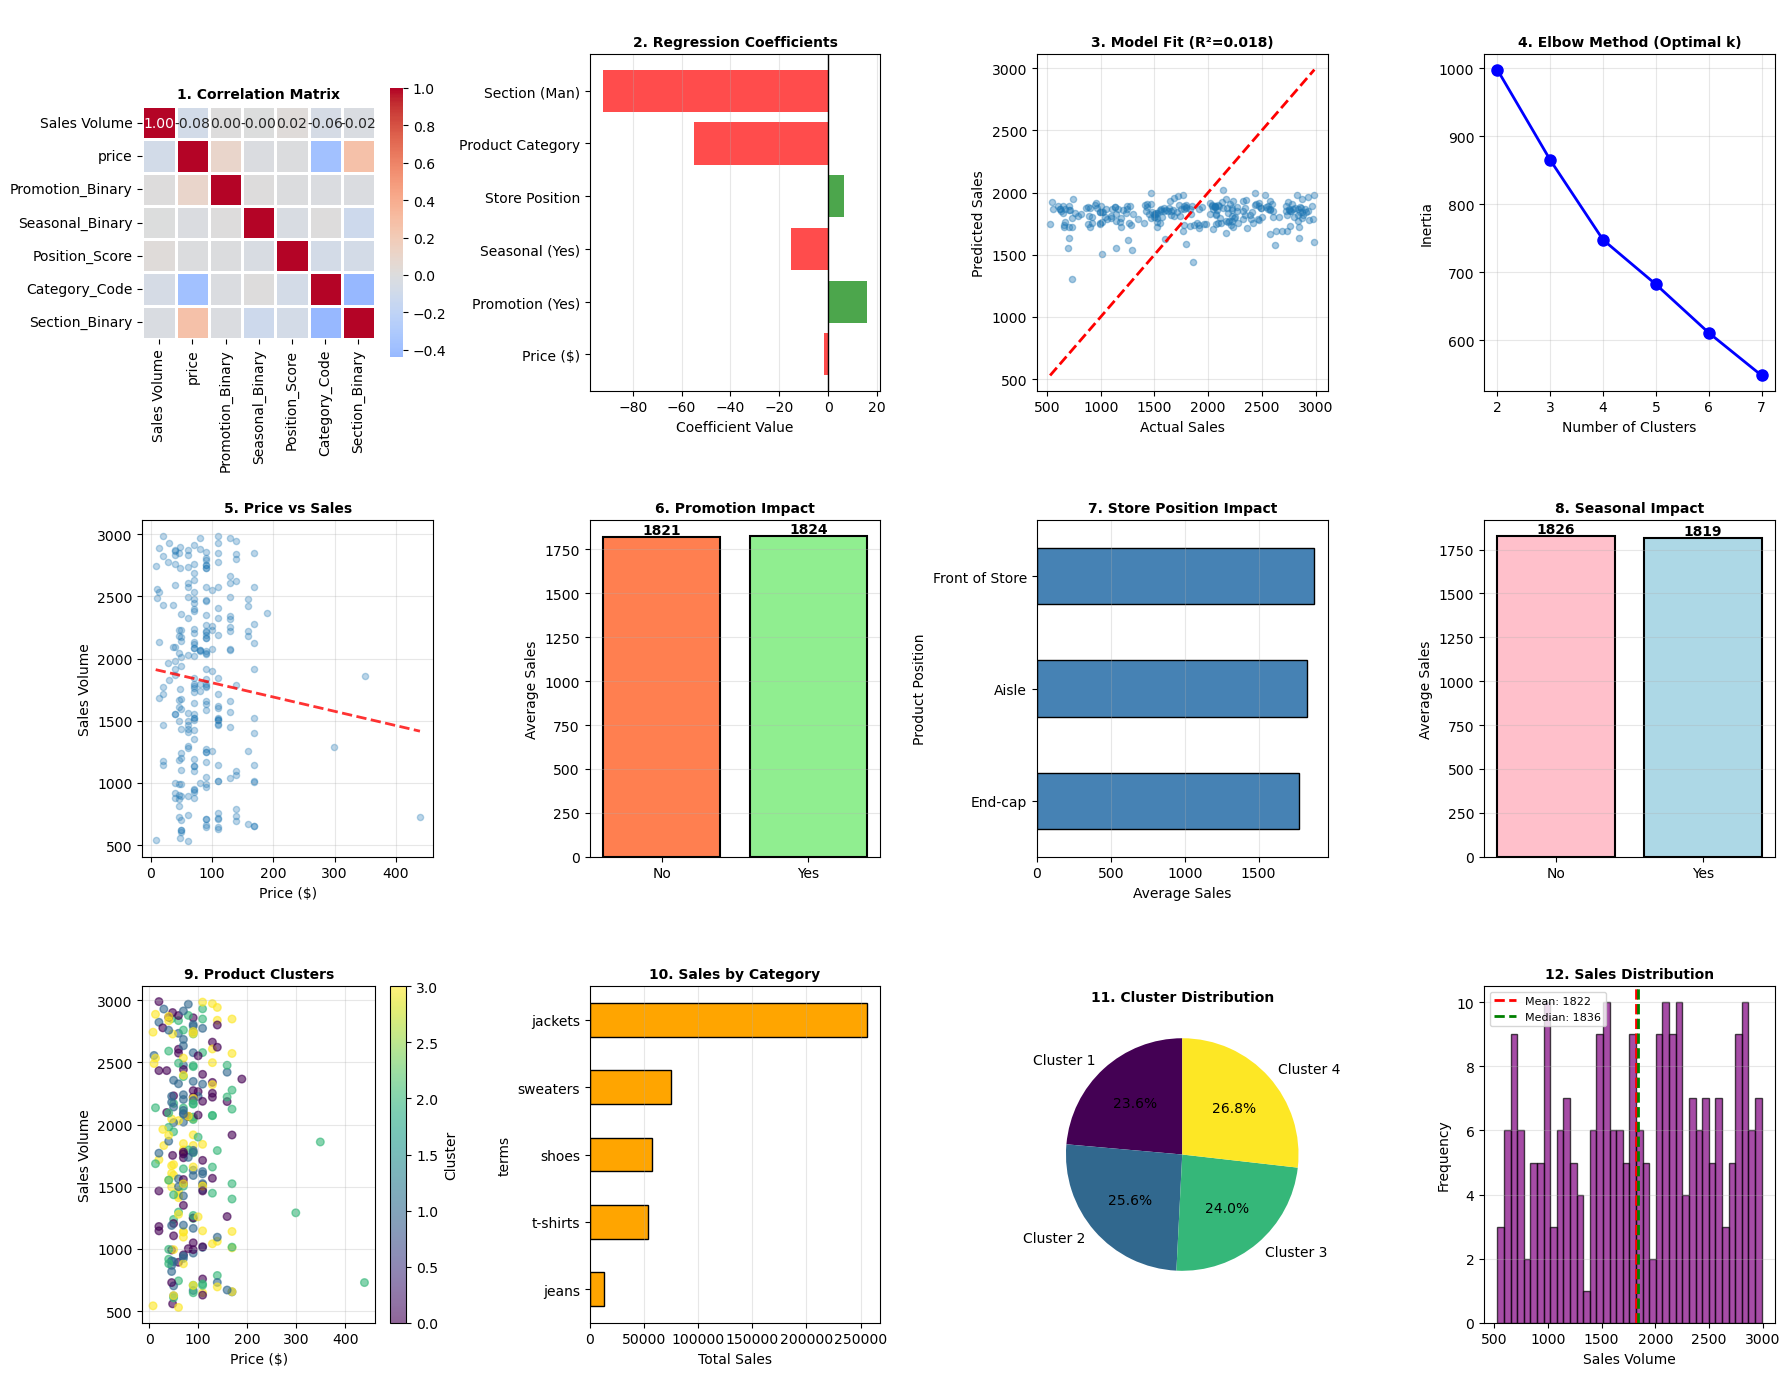

✓ Visualization saved as 'zara_complete_analysis.png'


In [55]:
# VISUAL EXPLORATION
fig = plt.figure(figsize=(18, 14))
fig.suptitle(' ', 
             fontsize=18, fontweight='bold')

# 1. Correlation Heatmap
ax1 = plt.subplot(3, 4, 1)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
ax1.set_title('1. Correlation Matrix', fontweight='bold', fontsize=10)

# 2. Regression Coefficients
ax2 = plt.subplot(3, 4, 2)
colors = ['green' if c > 0 else 'red' for c in results_df['Coefficient']]
ax2.barh(results_df['Factor'], results_df['Coefficient'], color=colors, alpha=0.7)
ax2.axvline(x=0, color='black', linestyle='-', linewidth=1)
ax2.set_xlabel('Coefficient Value')
ax2.set_title('2. Regression Coefficients', fontweight='bold', fontsize=10)
ax2.grid(axis='x', alpha=0.3)

# 3. Model Fit (Actual vs Predicted)
ax3 = plt.subplot(3, 4, 3)
ax3.scatter(Y, predictions, alpha=0.4, s=20)
ax3.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', lw=2)
ax3.set_xlabel('Actual Sales')
ax3.set_ylabel('Predicted Sales')
ax3.set_title(f'3. Model Fit (R²={r_squared:.3f})', fontweight='bold', fontsize=10)
ax3.grid(alpha=0.3)

# 4. Elbow Plot
ax4 = plt.subplot(3, 4, 4)
ax4.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
ax4.set_xlabel('Number of Clusters')
ax4.set_ylabel('Inertia')
ax4.set_title('4. Elbow Method (Optimal k)', fontweight='bold', fontsize=10)
ax4.grid(alpha=0.3)

# 5. Price vs Sales
ax5 = plt.subplot(3, 4, 5)
ax5.scatter(df['price'], df['Sales Volume'], alpha=0.3, s=20)
z = np.polyfit(df['price'], df['Sales Volume'], 1)
p = np.poly1d(z)
ax5.plot(df['price'].sort_values(), p(df['price'].sort_values()), 
         "r--", alpha=0.8, linewidth=2)
ax5.set_xlabel('Price ($)')
ax5.set_ylabel('Sales Volume')
ax5.set_title('5. Price vs Sales', fontweight='bold', fontsize=10)
ax5.grid(alpha=0.3)

# 6. Promotion Impact (same as Step 2)
ax6 = plt.subplot(3, 4, 6)
promo_avg = df.groupby('Promotion')['Sales Volume'].mean()
bars = ax6.bar(promo_avg.index, promo_avg.values, color=['coral', 'lightgreen'], 
               edgecolor='black', linewidth=1.5)
ax6.set_ylabel('Average Sales')
ax6.set_title('6. Promotion Impact', fontweight='bold', fontsize=10)
ax6.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.0f}', ha='center', va='bottom', fontweight='bold')

# 7. Store Position (same as Step 2)
ax7 = plt.subplot(3, 4, 7)
position_avg = df.groupby('Product Position')['Sales Volume'].mean().sort_values()
position_avg.plot(kind='barh', ax=ax7, color='steelblue', edgecolor='black')
ax7.set_xlabel('Average Sales')
ax7.set_title('7. Store Position Impact', fontweight='bold', fontsize=10)
ax7.grid(axis='x', alpha=0.3)

# 8. Seasonal Impact (same as Step 2)
ax8 = plt.subplot(3, 4, 8)
seasonal_avg = df.groupby('Seasonal')['Sales Volume'].mean()
bars = ax8.bar(seasonal_avg.index, seasonal_avg.values, color=['pink', 'lightblue'],
               edgecolor='black', linewidth=1.5)
ax8.set_ylabel('Average Sales')
ax8.set_title('8. Seasonal Impact', fontweight='bold', fontsize=10)
ax8.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax8.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.0f}', ha='center', va='bottom', fontweight='bold')

# 9. Product Clusters (Price vs Sales colored by cluster)
ax9 = plt.subplot(3, 4, 9)
scatter = ax9.scatter(df['price'], df['Sales Volume'], 
                      c=df['Cluster'], cmap='viridis', alpha=0.6, s=30)
ax9.set_xlabel('Price ($)')
ax9.set_ylabel('Sales Volume')
ax9.set_title('9. Product Clusters', fontweight='bold', fontsize=10)
plt.colorbar(scatter, ax=ax9, label='Cluster')
ax9.grid(alpha=0.3)

# 10. Sales by Category (same as Step 2)
ax10 = plt.subplot(3, 4, 10)
category_sales = df.groupby('terms')['Sales Volume'].sum().sort_values()
category_sales.plot(kind='barh', ax=ax10, color='orange', edgecolor='black')
ax10.set_xlabel('Total Sales')
ax10.set_title('10. Sales by Category', fontweight='bold', fontsize=10)
ax10.grid(axis='x', alpha=0.3)

# 11. Cluster Distribution
ax11 = plt.subplot(3, 4, 11)
cluster_counts = df['Cluster'].value_counts().sort_index()
colors_cluster = plt.cm.viridis(np.linspace(0, 1, n_clusters))
ax11.pie(cluster_counts.values, labels=[f'Cluster {i+1}' for i in range(n_clusters)], 
         autopct='%1.1f%%', colors=colors_cluster, startangle=90)
ax11.set_title('11. Cluster Distribution', fontweight='bold', fontsize=10)

# 12. Sales Distribution (same as Step 2)
ax12 = plt.subplot(3, 4, 12)
ax12.hist(df['Sales Volume'], bins=40, color='purple', alpha=0.7, edgecolor='black')
ax12.axvline(df['Sales Volume'].mean(), color='red', linestyle='--', 
             linewidth=2, label=f'Mean: {df["Sales Volume"].mean():.0f}')
ax12.axvline(df['Sales Volume'].median(), color='green', linestyle='--', 
             linewidth=2, label=f'Median: {df["Sales Volume"].median():.0f}')
ax12.set_xlabel('Sales Volume')
ax12.set_ylabel('Frequency')
ax12.set_title('12. Sales Distribution', fontweight='bold', fontsize=10)
ax12.legend(fontsize=8)
ax12.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('zara_complete_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization saved as 'zara_complete_analysis.png'")


In [48]:
# SUMMARY & RECOMMENDATIONS
print("SUMMARY & STRATEGIC RECOMMENDATIONS")

strongest_corr_series = sales_corr[sales_corr.index != 'Sales Volume']
strongest_corr_name = strongest_corr_series.index[0]
strongest_corr_value = strongest_corr_series.iloc[0]
print(f"1. Strongest correlation: {strongest_corr_name} ({strongest_corr_value:.3f})")

# Most important factor from regression
most_important_idx = np.argmax(np.abs(coefficients))
most_important_factor = results_df.iloc[most_important_idx]['Factor']
most_important_coef = results_df.iloc[most_important_idx]['Coefficient']
print(f"2. Most impactful factor: {most_important_factor} ({most_important_coef:+.1f})")

# Model quality
print(f"3. Model explains {r_squared*100:.1f}% of sales variation")

# Best cluster
best_cluster = df.groupby('Cluster')['Sales Volume'].mean().idxmax()
best_cluster_sales = df[df['Cluster']==best_cluster]['Sales Volume'].mean()
print(f"4. Top cluster: Cluster {best_cluster+1} (Avg sales: {best_cluster_sales:.0f} units)")

print("\n💡 RECOMMENDATIONS:")
print("-"*80)

# Promotion
promo_coef = coefficients[1]
if promo_coef > 100:
    print(f"✓ PROMOTIONS: Very effective! (+{promo_coef:.0f} units)")
    print("  → Increase promotional frequency")
elif promo_coef > 0:
    print(f"✓ PROMOTIONS: Moderately helpful (+{promo_coef:.0f} units)")
    print("  → Continue targeted promotions")
else:
    print("✗ PROMOTIONS: Not driving significant sales")
    print("  → Reconsider promotional strategy")

# Position
position_coef = coefficients[3]
if position_coef > 0:
    print(f"\n✓ PLACEMENT: Important factor! (+{position_coef:.0f} units per level)")
    print("  → Place bestsellers at front of store")
    print("  → Use end-caps for seasonal/promotional items")

# Clustering strategy
print("\n✓ SEGMENTATION: Use clusters for targeted strategies")
for cluster_id in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster_id]
    avg_sales = cluster_data['Sales Volume'].mean()
    
    if avg_sales > df['Sales Volume'].quantile(0.75):
        print(f"  → Cluster {cluster_id+1}: Maximize visibility & stock")
    elif avg_sales < df['Sales Volume'].quantile(0.25):
        print(f"  → Cluster {cluster_id+1}: Consider clearance/discounts")
    else:
        print(f"  → Cluster {cluster_id+1}: Maintain current approach")

SUMMARY & STRATEGIC RECOMMENDATIONS
1. Strongest correlation: Position_Score (0.020)
2. Most impactful factor: Section (Man) (-92.2)
3. Model explains 1.8% of sales variation
4. Top cluster: Cluster 1 (Avg sales: 1854 units)

💡 RECOMMENDATIONS:
--------------------------------------------------------------------------------
✓ PROMOTIONS: Moderately helpful (+16 units)
  → Continue targeted promotions

✓ PLACEMENT: Important factor! (+6 units per level)
  → Place bestsellers at front of store
  → Use end-caps for seasonal/promotional items

✓ SEGMENTATION: Use clusters for targeted strategies
  → Cluster 1: Maintain current approach
  → Cluster 2: Maintain current approach
  → Cluster 3: Maintain current approach
  → Cluster 4: Maintain current approach
